In [2]:
from umap import UMAP

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc 
from tqdm.notebook import tqdm
import os

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Processing Q1.000_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

1.000
1.000
1.000
1.000


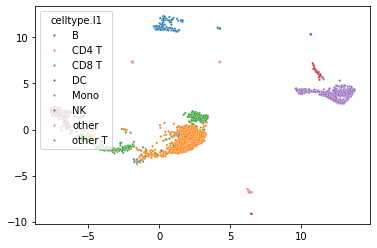

In [24]:
# base directory for embeddings
embeddings_dir = '../embeddings/PBMC_CITEseq/'
results = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(embeddings_dir)[::-1]:
    quality_path = os.path.join(embeddings_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # find held-out cells
    held_out_path = os.path.join(quality_path, 'held_out_cells.h5ad')
    held_out = sc.read_h5ad(held_out_path)

    P1 = [held_out.obs.index.get_loc(held_out[held_out.obs['donor'] == 'P1'].obs.index[i]) \
                            for i in range(len(held_out[held_out.obs['donor'] == 'P1'].obs.index))]

    UMI_per_cell = held_out.raw.X.sum()/len(held_out)

    for file in tqdm(os.listdir(quality_path)[::-1], desc=f"Processing {quality_dir}"):
        if not file.endswith('.npy'):
            continue

        # extract method and fraction from filename
        method, frac = file.split('_')
        frac = frac[4:-4]
        print(frac)

        if method == 'VAE':
            # load embeddings
            embedding_path = os.path.join(quality_path, file)
            embeddings = np.load(embedding_path)

            # run UMAP
            umap = UMAP(n_components=2)
            umap_embeddings = umap.fit_transform(embeddings)

            sns.scatterplot(x=umap_embeddings[P1, 0], y=umap_embeddings[P1, 1], 
                            hue=held_out[held_out.obs['donor'] == 'P1'].obs['celltype.l1'], s=5)
            plt.show()